## Lecture Notes on Naive Bayes Classification and NLP from JosePortilla_UDEMY - Henric Jandoc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use(['science', 'notebook','grid','no-latex'])

## Coding count vectorization manually (just read the lecture notebook)

In [4]:
with open('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\18-Naive-Bayes-and-NLP\\One.txt') as mytext:
    a = mytext.read()

In [5]:
print(a)

This is a story about dogs
our canine pets
Dogs are furry animals



In [7]:
with open('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\18-Naive-Bayes-and-NLP\\One.txt') as mytext:
    a = mytext.readlines()
a

['This is a story about dogs\n',
 'our canine pets\n',
 'Dogs are furry animals\n']

## Feature Extraction from Test - with Scikit-Learn

In [8]:
text = ['This is a line', 'This is another line', 'Completely different line']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer

In [10]:
# help(CountVectorizer)

In [22]:
cv = CountVectorizer() # (stop_words = 'english')

In [23]:
sparse_matrix = cv.fit_transform(text)

In [24]:
sparse_matrix.todense()

matrix([[0, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 1, 0, 1, 0]], dtype=int64)

In [25]:
cv.vocabulary_

{'this': 5, 'is': 3, 'line': 4, 'another': 0, 'completely': 1, 'different': 2}

In [21]:
tfidf = TfidfTransformer()

In [26]:
results = tfidf.fit_transform(sparse_matrix)  # bag of words (BOW)

In [27]:
results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

In [28]:
tv = TfidfVectorizer()

In [29]:
tv_results = tv.fit_transform(text)

In [30]:
tv_results.todense()

matrix([[0.        , 0.        , 0.        , 0.61980538, 0.48133417,
         0.61980538],
        [0.63174505, 0.        , 0.        , 0.4804584 , 0.37311881,
         0.4804584 ],
        [0.        , 0.65249088, 0.65249088, 0.        , 0.38537163,
         0.        ]])

## Classification with Text Data

In [31]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\airline_tweets.csv')

In [33]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

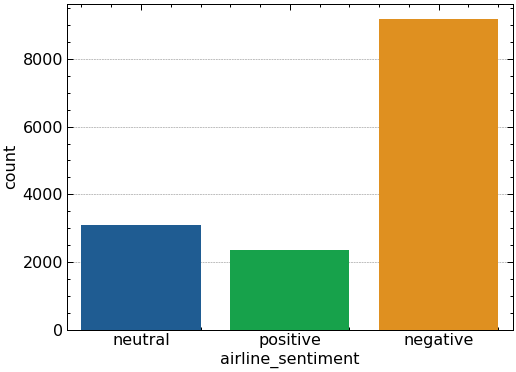

In [34]:
sns.countplot(data = df, x = 'airline_sentiment')

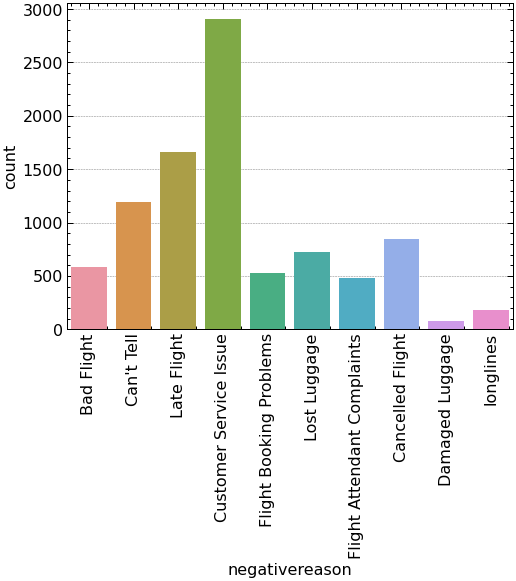

In [35]:
sns.countplot(data = df, x ='negativereason')
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='airline', ylabel='count'>

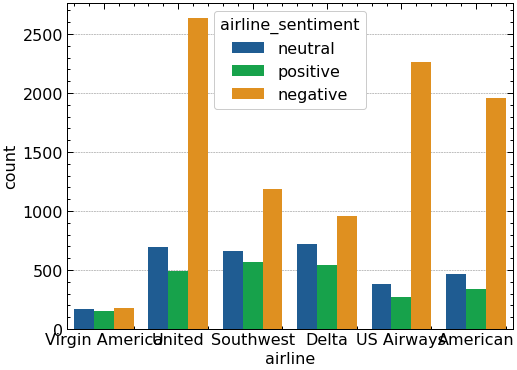

In [36]:
sns.countplot(data = df, x = 'airline', hue = 'airline_sentiment')

In [39]:
data = df[['airline_sentiment', 'text']]

In [38]:
X = df['text']
y = data['airline_sentiment']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [43]:
# from sklearn.feature_extraction.text import TfidVectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [45]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [46]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [48]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [49]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [52]:
from sklearn.svm import SVC, LinearSVC

rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [53]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [54]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [55]:
def report(model):
    
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.68      1.00      0.80      1837
     neutral       0.84      0.16      0.27       623
    positive       0.87      0.18      0.30       468

    accuracy                           0.69      2928
   macro avg       0.79      0.45      0.46      2928
weighted avg       0.74      0.69      0.61      2928



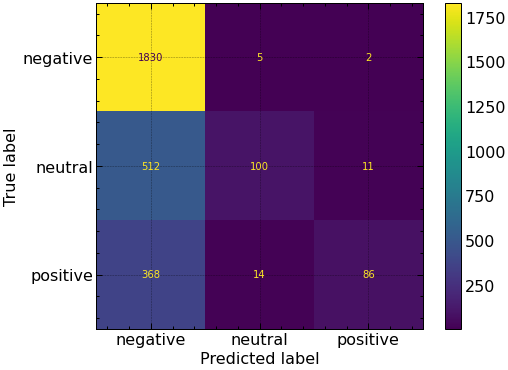

In [56]:
report(nb)

              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1837
     neutral       0.68      0.49      0.57       623
    positive       0.83      0.61      0.71       468

    accuracy                           0.79      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



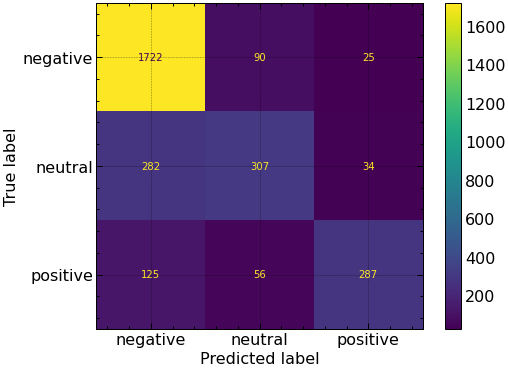

In [57]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.79      0.95      0.87      1837
     neutral       0.71      0.44      0.54       623
    positive       0.83      0.59      0.69       468

    accuracy                           0.79      2928
   macro avg       0.78      0.66      0.70      2928
weighted avg       0.78      0.79      0.77      2928



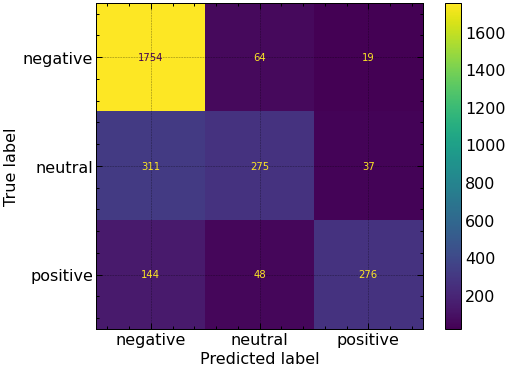

In [58]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.83      0.90      0.87      1837
     neutral       0.63      0.54      0.58       623
    positive       0.77      0.67      0.71       468

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.78      2928



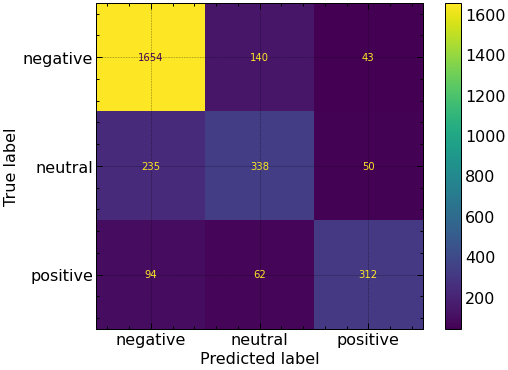

In [59]:
report(linear_svc)

In [60]:
from sklearn.pipeline import Pipeline

In [62]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [63]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [64]:
pipe.predict(['good flight'])

array(['positive'], dtype=object)

In [65]:
pipe.predict(['shit flight'])

array(['negative'], dtype=object)